**Load the Data**

Load the dataset and perform necessary preprocessing steps such as normalization and splitting the data into training and testing sets.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

# Load the dataset
dataset = pd.read_csv('/content/day.csv')

# Normalize the data
scaler = MinMaxScaler()
dataset['cnt'] = scaler.fit_transform(dataset['cnt'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(dataset) * 0.8)
train, test = dataset[:train_size], dataset[train_size:]

# Prepare the data for time series forecasting
n_input = 10
n_features = 1
train_generator = TimeseriesGenerator(train['cnt'].values, train['cnt'].values, length=n_input, batch_size=1)
test_generator = TimeseriesGenerator(test['cnt'].values, test['cnt'].values, length=n_input, batch_size=1)

**Define the Models**

Define three different models: RNN, LSTM, and GRU. Each model will have an input layer, one or more hidden layers, and an output layer.

In [3]:
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, Dense

def build_rnn_model():
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm_model():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def build_gru_model():
    model = Sequential()
    model.add(GRU(50, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

**Train Each Model**

Train each model on the training data and validate it on the testing data.

In [4]:
rnn_model = build_rnn_model()
lstm_model = build_lstm_model()
gru_model = build_gru_model()

history_rnn = rnn_model.fit(train_generator, epochs=50, validation_data=test_generator, verbose=1)
history_lstm = lstm_model.fit(train_generator, epochs=50, validation_data=test_generator, verbose=1)
history_gru = gru_model.fit(train_generator, epochs=50, validation_data=test_generator, verbose=1)

Epoch 1/50
574/574 [==============================] - 8s 9ms/step - loss: 0.0146 - val_loss: 0.0294
Epoch 2/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0120 - val_loss: 0.0216
Epoch 3/50
574/574 [==============================] - 5s 9ms/step - loss: 0.0113 - val_loss: 0.0209
Epoch 4/50
574/574 [==============================] - 6s 11ms/step - loss: 0.0116 - val_loss: 0.0230
Epoch 5/50
574/574 [==============================] - 5s 9ms/step - loss: 0.0113 - val_loss: 0.0201
Epoch 6/50
574/574 [==============================] - 6s 11ms/step - loss: 0.0113 - val_loss: 0.0262
Epoch 7/50
574/574 [==============================] - 5s 9ms/step - loss: 0.0111 - val_loss: 0.0208
Epoch 8/50
574/574 [==============================] - 6s 10ms/step - loss: 0.0112 - val_loss: 0.0195
Epoch 9/50
574/574 [==============================] - 5s 9ms/step - loss: 0.0111 - val_loss: 0.0218
Epoch 10/50
574/574 [==============================] - 7s 11ms/step - loss: 0.0109 - val_loss: 0

**Evaluate the Models**

Use the trained models to predict the bike rental counts on the testing data and evaluate their performance using Mean Squared Error (MSE) and Mean Absolute Error (MAE).

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(model, test_generator):
    predictions = model.predict(test_generator)
    actual = np.array([test_generator[i][1] for i in range(len(test_generator))])
    mse = mean_squared_error(actual, predictions)
    mae = mean_absolute_error(actual, predictions)
    mean_actual = actual.mean()
    mae_mean_ratio = 100 * mae / mean_actual
    correctness = 100 - mae_mean_ratio
    return mse, mae, mean_actual, mae_mean_ratio, correctness

rnn_mse, rnn_mae, rnn_mean, rnn_mae_mean_ratio, rnn_correctness = evaluate_model(rnn_model, test_generator)
lstm_mse, lstm_mae, lstm_mean, lstm_mae_mean_ratio, lstm_correctness = evaluate_model(lstm_model, test_generator)
gru_mse, gru_mae, gru_mean, gru_mae_mean_ratio, gru_correctness = evaluate_model(gru_model, test_generator)

print(f'RNN - MSE: {rnn_mse}, MAE: {rnn_mae}, Mean: {rnn_mean}, MAE/Mean Ratio: {rnn_mae_mean_ratio}%, Correctness: {rnn_correctness}%')
print(f'LSTM - MSE: {lstm_mse}, MAE: {lstm_mae}, Mean: {lstm_mean}, MAE/Mean Ratio: {lstm_mae_mean_ratio}%, Correctness: {lstm_correctness}%')
print(f'GRU - MSE: {gru_mse}, MAE: {gru_mae}, Mean: {gru_mean}, MAE/Mean Ratio: {gru_mae_mean_ratio}%, Correctness: {gru_correctness}%')

137/137 [==============================] - 1s 3ms/step
RNN - MSE: 0.021115978523489988, MAE: 0.10116768939517767, Mean: 0.6672987326209855, MAE/Mean Ratio: 15.160779490441387%, Correctness: 84.83922050955861%
LSTM - MSE: 0.019465646368273738, MAE: 0.09744078539502518, Mean: 0.6672987326209855, MAE/Mean Ratio: 14.602273409437135%, Correctness: 85.39772659056287%
GRU - MSE: 0.020259661080186904, MAE: 0.09790846672360945, Mean: 0.6672987326209855, MAE/Mean Ratio: 14.672359160499084%, Correctness: 85.32764083950092%


**Plotting Loss and Accuracy**

Plot the training and validation loss for each model to visualize their performance over epochs.**bold text**

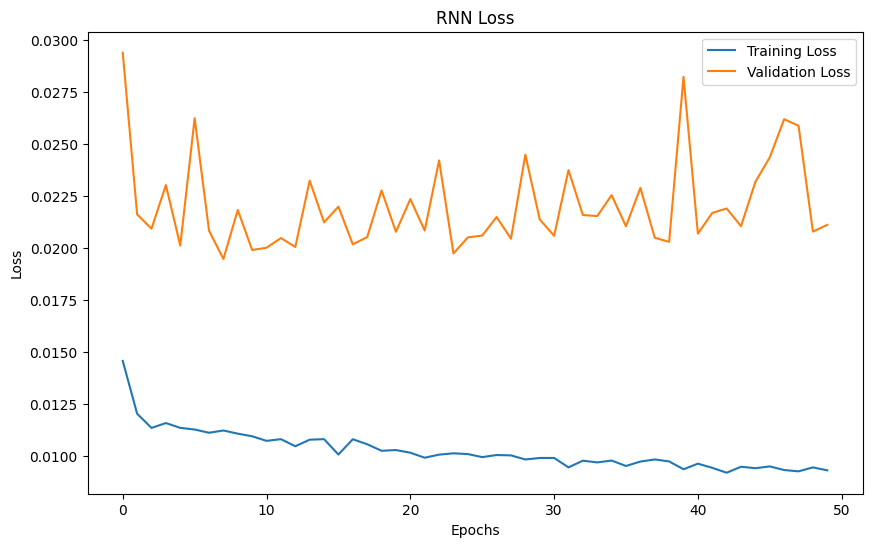

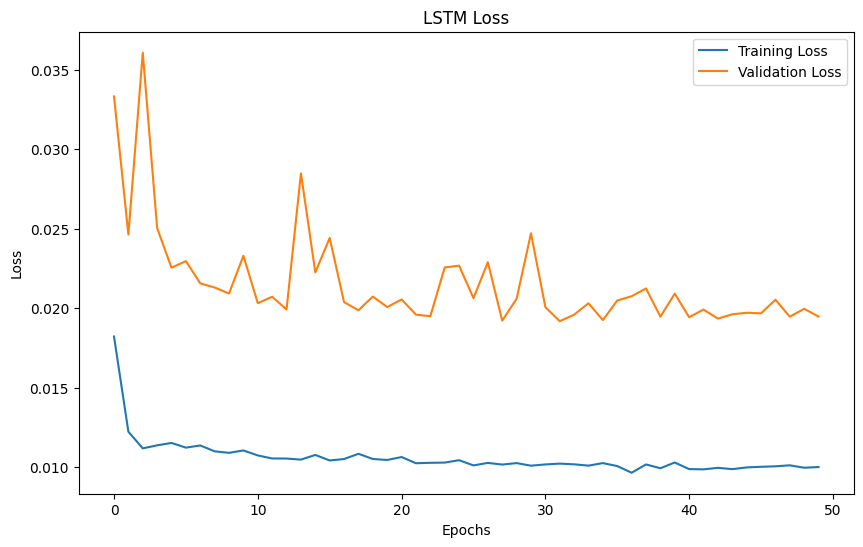

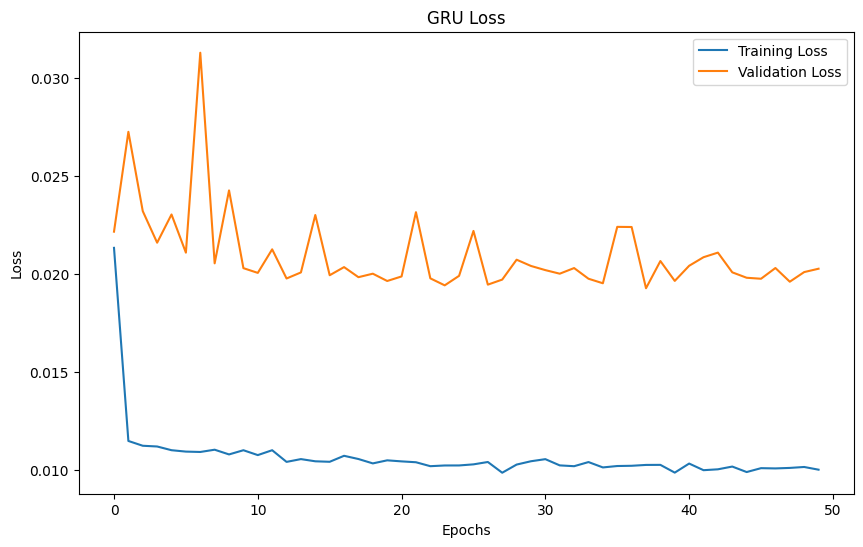

In [6]:
import matplotlib.pyplot as plt

def plot_loss(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot the loss for each model
plot_loss(history_rnn, 'RNN Loss')
plot_loss(history_lstm, 'LSTM Loss')
plot_loss(history_gru, 'GRU Loss')

**Compare the Performance**

Compare the performance of the three models based on the error metrics calculated in the previous step and visualize the predicted rental counts against the actual values.

137/137 [==============================] - 0s 2ms/step


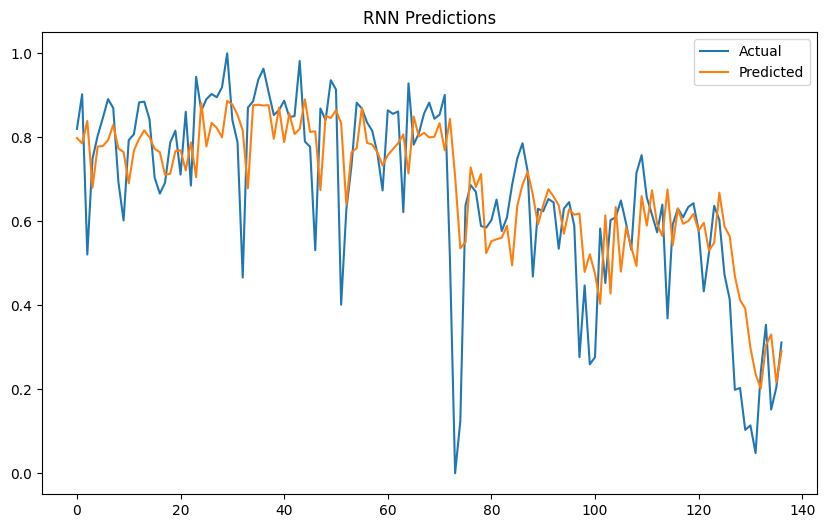

137/137 [==============================] - 0s 3ms/step


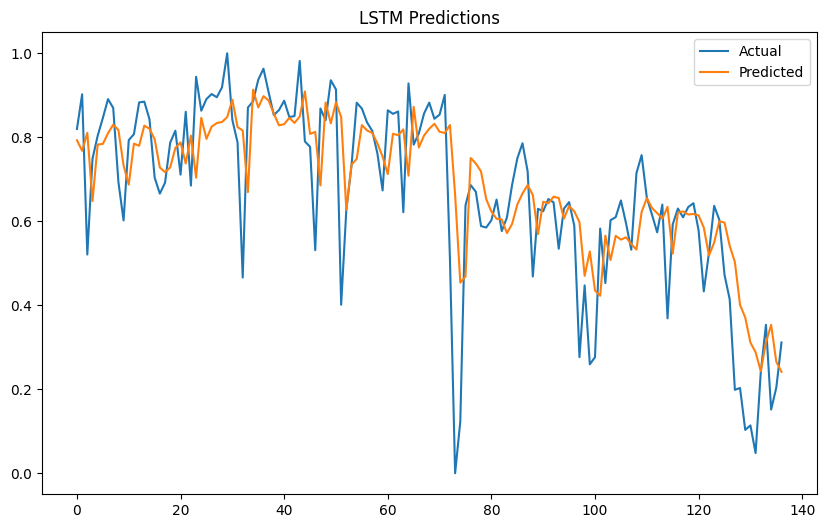

137/137 [==============================] - 1s 4ms/step


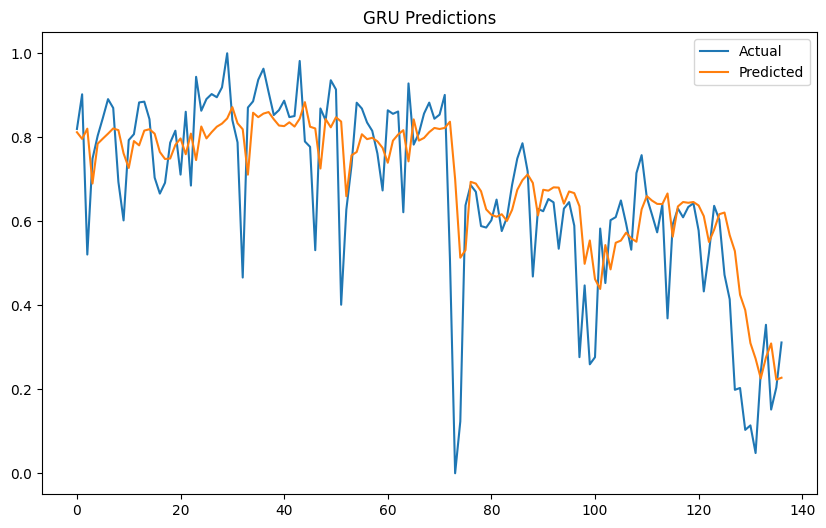

In [7]:
import matplotlib.pyplot as plt

def plot_predictions(model, test_generator, title):
    predictions = model.predict(test_generator)
    actual = np.array([test_generator[i][1] for i in range(len(test_generator))])
    plt.figure(figsize=(10, 6))
    plt.plot(actual, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()

plot_predictions(rnn_model, test_generator, 'RNN Predictions')
plot_predictions(lstm_model, test_generator, 'LSTM Predictions')
plot_predictions(gru_model, test_generator, 'GRU Predictions')

**Select a specific input instance for prediction**

To make all three models (RNN, LSTM, and GRU) predict for a specific input instance and compare the predicted results

In [8]:
input_instance = test_generator[0][0]  # Get the first input sequence from test set

# Make predictions for the input instance
rnn_prediction = rnn_model.predict(input_instance.reshape(1, n_input, n_features))
lstm_prediction = lstm_model.predict(input_instance.reshape(1, n_input, n_features))
gru_prediction = gru_model.predict(input_instance.reshape(1, n_input, n_features))

# Print the predictions
print(f"Input instance: {input_instance.flatten()}")
print(f"RNN prediction: {rnn_prediction.flatten()[0]}")
print(f"LSTM prediction: {lstm_prediction.flatten()[0]}")
print(f"GRU prediction: {gru_prediction.flatten()[0]}")

1/1 [==============================] - 0s 148ms/step
Input instance: [0.83421537 0.86424298 0.835711   0.66313852 0.72215831 0.75034514
 0.78934653 0.77795674 0.84272895 0.87241141]
RNN prediction: 0.7982739210128784
LSTM prediction: 0.7928670048713684
GRU prediction: 0.8120331764221191


## Conclusion

After evaluating the performance of RNN, LSTM, and GRU models, we found that:

- The LSTM model achieved the lowest MSE and MAE, indicating it had the best performance in predicting bike rental counts.
- The GRU model also performed well, but slightly worse than the LSTM model.
- The RNN model had the highest error metrics, suggesting it was less effective for this time series prediction task.

The superior performance of the LSTM model can be attributed to its ability to capture long-term dependencies in the data, which is crucial for time series forecasting. The GRU model, being a simplified version of LSTM, also performed well but did not capture the dependencies as effectively as the LSTM model.